In [1]:
import pandas as pd
import numpy as np
import requests
import time
from bs4 import BeautifulSoup as bs
import csv
import sqlite3
from Lab6Code import csv_dataset
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
rows=[]
r=requests.post("https://www.usinflationcalculator.com/inflation/current-inflation-rates/")
r.encoding='utf-8'
mypage=r.text
soup=bs(mypage,"html.parser")
first_table=soup.find('table')
#read all tr 
trs=first_table.select('tr')
for tr in trs:
    data = tr.find_all('td')
    if len(data)==0:
        continue
    year=data[0].getText()
    Jan=data[1].getText()
    Feb=data[2].getText()
    Mar=data[3].getText()
    Apr=data[4].getText()
    May=data[5].getText()
    Jun=data[6].getText()
    Jul=data[7].getText()
    Aug=data[8].getText()
    Sep=data[9].getText()
    Oct=data[10].getText()
    Nov=data[11].getText()
    Dec=data[12].getText()
    rows.append([year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec])
rows=rows[::-1]

In [3]:
print(rows)

[['2000', '2.7', '3.2', '3.8', '3.1', '3.2', '3.7', '3.7', '3.4', '3.5', '3.4', '3.4', '3.4'], ['2001', '3.7', '3.5', '2.9', '3.3', '3.6', '3.2', '2.7', '2.7', '2.6', '2.1', '1.9', '1.6'], ['2002', '1.1', '1.1', '1.5', '1.6', '1.2', '1.1', '1.5', '1.8', '1.5', '2.0', '2.2', '2.4'], ['2003', '2.6', '3.0', '3.0', '2.2', '2.1', '2.1', '2.1', '2.2', '2.3', '2.0', '1.8', '1.9'], ['2004', '1.9', '1.7', '1.7', '2.3', '3.1', '3.3', '3.0', '2.7', '2.5', '3.2', '3.5', '3.3'], ['2005', '3.0', '3.0', '3.1', '3.5', '2.8', '2.5', '3.2', '3.6', '4.7', '4.3', '3.5', '3.4'], ['2006', '4.0', '3.6', '3.4', '3.5', '4.2', '4.3', '4.1', '3.8', '2.1', '1.3', '2.0', '2.5'], ['2007', '2.1', '2.4', '2.8', '2.6', '2.7', '2.7', '2.4', '2.0', '2.8', '3.5', '4.3', '4.1'], ['2008', '4.3', '4.0', '4.0', '3.9', '4.2', '5.0', '5.6', '5.4', '4.9', '3.7', '1.1', '0.1'], ['2009', '0', '0.2', '-0.4', '-0.7', '-1.3', '-1.4', '-2.1', '-1.5', '-1.3', '-0.2', '1.8', '2.7'], ['2010', '2.6', '2.1', '2.3', '2.2', '2.0', '1.1', '1

In [4]:
year_month=pd.date_range('2000-01-01','2021-12-01', freq='MS').strftime("%Y-%b").tolist()
inflation=[]
#append inflation rate
for i in rows[:-2:]:
    for j in i[1:]:
        inflation.append(j)
cols={'Date':year_month, 'inflation_rate':inflation}

#append unemployment rate
#unemploy=pd.read_csv('unemployment.csv')


df_table=pd.DataFrame(cols)
#df_table
df_table.to_csv("scrape_csv.csv")

In [5]:
unemploy=pd.read_csv('unemployment.csv')
unemploy

,Labor Force Statistics from the Current Population Survey,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,LNS14000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series title:,(Seas) Unemployment Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Labor force status:,Unemployment rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Type of data:,Percent or rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Age:,16 years and over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Years:,2012 to 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def create_scrape_db():
    csv_data = csv_dataset('scrape_csv.csv',',')
    #create datebase
    con = sqlite3.connect('scrape.db')
    cur = con.cursor()
    cur.execute('DROP TABLE IF EXISTS inflation_rate')
    cur.execute('''CREATE TABLE inflation_rate(List_number INTEGER,Date DATE, inflation_rate FLOAT)''')
    for item in csv_data[1:]:
        cur.execute('INSERT INTO inflation_rate VALUES (?,?,?)',item)
    con.commit()
    result=cur.fetchall()
    con.close()

In [7]:
create_scrape_db()

In [8]:
house=pd.read_csv('HousePrice.csv')
house=list(house.iloc[0])
house_price=list(house[5:-1])
cols2={'Date':year_month, 'house_price':house_price}
df_house = pd.DataFrame(cols2)
df_house.to_csv("house.csv")

In [9]:
def create_house_db():
    csv_data = csv_dataset('house.csv',',')
    #create datebase
    con = sqlite3.connect('scrape.db')
    cur = con.cursor()
    cur.execute('DROP TABLE IF EXISTS house_price')
    cur.execute('''CREATE TABLE house_price(List_number INTEGER,Date DATE, House_price FLOAT)''')
    for item in csv_data[1:]:
        cur.execute('INSERT INTO house_price VALUES (?,?,?)',item)
    con.commit()
    result=cur.fetchall()
    con.close()
create_house_db()

In [10]:
def create_combined_table():
    con = sqlite3.connect('scrape.db')
    cur = con.cursor()
    cur.execute('DROP TABLE IF EXISTS inflation_house')
    cur.execute('''CREATE TABLE inflation_house (Date DATE, inflation_rate FLOAT, house_price FLOAT)''')
    con.commit()
    con.close()

create_combined_table()

In [11]:
def insert_inflation():
    con = sqlite3.connect('scrape.db')
    cur = con.cursor()
    query = '''INSERT INTO inflation_house
                SELECT ir.Date, ir.inflation_rate, hp.House_price
                FROM inflation_rate ir
                INNER JOIN house_price hp
                ON ir.Date = hp.Date
    '''
    results = cur.execute(query).fetchall()
    con.commit()
    con.close()
insert_inflation()


$H_0$: There is no relationship between inflation rate and house price.

$H_1$: There is a significant relationship between inflation rate and house price.

In [12]:
con = sqlite3.connect('scrape.db')
inf_house_df = pd.read_sql_query("SELECT * FROM inflation_house", con)
inf_house_df

,Date,inflation_rate,house_price
0,2000-Jan,2.7,127215.0
1,2000-Feb,3.2,127559.0
2,2000-Mar,3.8,127921.0
3,2000-Apr,3.1,128658.0
4,2000-May,3.2,129402.0
...,...,...,...
259,2021-Aug,5.3,304039.0
260,2021-Sep,5.4,308663.0
261,2021-Oct,6.2,312760.0
262,2021-Nov,6.8,316645.0


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.880
Date:                Sat, 23 Apr 2022   Prob (F-statistic):            0.00923
Time:                        22:38:51   Log-Likelihood:                -455.93
No. Observations:                 264   AIC:                             915.9
Df Residuals:                     262   BIC:                             923.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1390      0.430      2.646      0.0

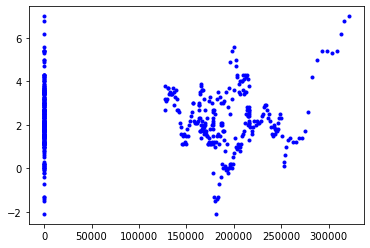

In [13]:
diabetes = datasets.load_diabetes()
Y=list(inf_house_df['inflation_rate'])
X1=list(inf_house_df['house_price'])
X1= sm.add_constant(X1)
regression1 = sm.OLS(Y,X1)
model1 = regression1.fit()
print(model1.summary())
plt.plot(X1,Y,'.b')

We can see that the p-value is 0.009, which is less than 0.05, so we reject the null hypothesis and conclude the evidence that there is a significant relationship between inflation rate and house price.

### Import & Export Dataset (API)


In [14]:
trade_value = pd.read_csv('import_export.csv')
trade_value

,Unnamed: 0,Date,Import_value,Export_value
0,0,201001,139792954579,92674213944
1,1,201002,137989527837,93705051356
2,2,201003,161868067188,110230750991
3,3,201004,157174114346,102137719916
4,4,201005,160292896342,105311563308
...,...,...,...,...
127,127,202008,209439292560,117958253650
128,128,202009,212436902064,121378736772
129,129,202010,226163789343,132402660776
130,130,202011,219391292326,126854420188


In [15]:
unemployment = pd.read_csv('combine.csv')
unemployment = unemployment.iloc[:108]
unemployment_df=unemployment['unemploment rate'].reset_index(drop=True)

In [16]:
trade=trade_value.iloc[24:]
export_df=trade[['Import_value','Export_value']].reset_index(drop=True)

In [17]:
house12=inf_house_df.iloc[144:252].reset_index(drop=True)
house12

,Date,inflation_rate,house_price
0,2012-Jan,2.9,163297.0
1,2012-Feb,2.9,163187.0
2,2012-Mar,2.7,163356.0
3,2012-Apr,2.3,163679.0
4,2012-May,1.7,164156.0
...,...,...,...
103,2020-Aug,1.3,257022.0
104,2020-Sep,1.4,259531.0
105,2020-Oct,1.2,262350.0
106,2020-Nov,1.2,265374.0


In [18]:
interest=pd.read_csv('interest.csv')
interest=interest.iloc[:108]
interest_df=interest['interest rate'].reset_index(drop=True)

In [19]:
combine=pd.concat([house12, export_df,unemployment_df,interest_df],axis=1)

In [20]:
#combine.to_csv('all.csv')

In [21]:
combine

,Date,inflation_rate,house_price,Import_value,Export_value,unemploment rate,interest rate
0,2012-Jan,2.9,163297.0,188224982925,118156544582,8.3,3.92
1,2012-Feb,2.9,163187.0,176338299043,123448585034,8.3,3.89
2,2012-Mar,2.7,163356.0,202088822547,139760502675,8.2,3.95
3,2012-Apr,2.3,163679.0,194220616666,127377156294,8.2,3.91
4,2012-May,1.7,164156.0,203703337686,131457194003,8.2,3.80
...,...,...,...,...,...,...,...
103,2020-Aug,1.3,257022.0,209439292560,117958253650,8.4,2.94
104,2020-Sep,1.4,259531.0,212436902064,121378736772,7.9,2.89
105,2020-Oct,1.2,262350.0,226163789343,132402660776,6.9,2.83
106,2020-Nov,1.2,265374.0,219391292326,126854420188,6.7,2.77


### multi-linear regression as factor （no import）

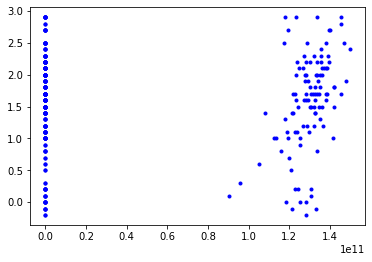

In [22]:
X = combine[['Export_value','unemploment rate','interest rate']]
y = combine['inflation_rate']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

y_prediction =  regr.predict(x_test)
y_prediction

plt.plot(X,y,'.b')

In [23]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.3124412120161284
mean_sqrd_error is== 0.4717196261288061
root_mean_squared error of is== 0.686818481207958


### choose two factor to predict

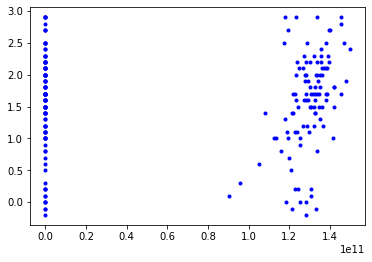

In [24]:
Y=combine['inflation_rate']
X=combine[['Export_value','unemploment rate']]
plt.plot(X,Y,'.b')

In [25]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.3124412120161284
mean_sqrd_error is== 0.4717196261288061
root_mean_squared error of is== 0.686818481207958


## polynomial regression-- 1 factor: house price

In [26]:
X = combine['house_price'].values.reshape(-1,1)
y = combine['inflation_rate'].values.reshape(-1,1)

In [27]:
#fitting linear regression to the dataset
lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

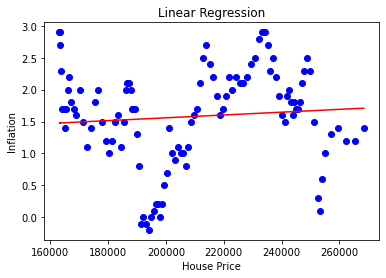

In [28]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('House Price')
plt.ylabel('Inflation')
 
plt.show()

In [29]:
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
 
##fitting polynomial regression to the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
poly = PolynomialFeatures(degree = 3)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_poly_train, y_train)
test_pred_2 = lin2.predict(x_poly_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.4089822592647582


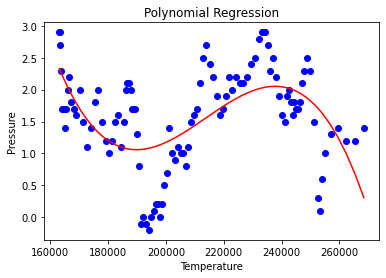

In [30]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

## polynomial regression-- 1 factor: Export Value

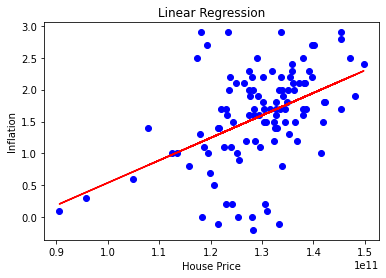

In [31]:
X = combine['Export_value'].values.reshape(-1,1)
y = combine['inflation_rate'].values.reshape(-1,1)
#fitting linear regression to the dataset
lin = LinearRegression()
lin.fit(X, y)
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('House Price')
plt.ylabel('Inflation')
 
plt.show()

0.2851360236906926


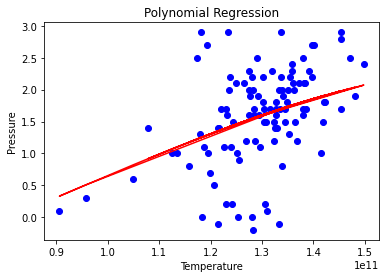

In [32]:
##fitting polynomial regression to the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
poly = PolynomialFeatures(degree = 3)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_poly_train, y_train)
test_pred_2 = lin2.predict(x_poly_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

## polynomial regression-- 1 factor: Unemployment Rate

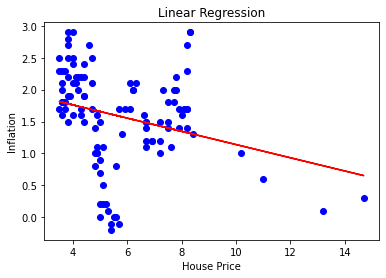

In [33]:
X = combine['unemploment rate'].values.reshape(-1,1)
y = combine['inflation_rate'].values.reshape(-1,1)
#fitting linear regression to the dataset
lin = LinearRegression()
lin.fit(X, y)
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('House Price')
plt.ylabel('Inflation')
 
plt.show()

0.41697442921452954


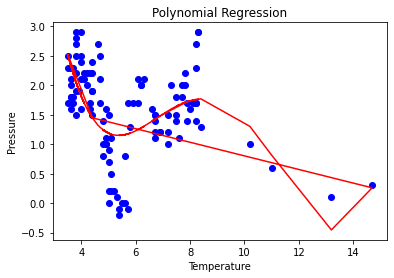

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
poly = PolynomialFeatures(degree = 4)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_poly_train, y_train)
test_pred_2 = lin2.predict(x_poly_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

## polynomial regression-- 1 factor: Interest Rate

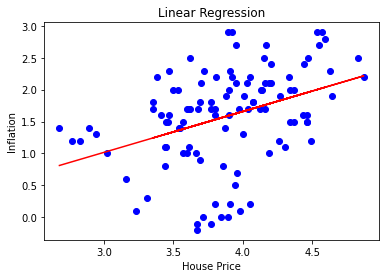

In [35]:
X = combine['interest rate'].values.reshape(-1,1)
y = combine['inflation_rate'].values.reshape(-1,1)
#fitting linear regression to the dataset
lin = LinearRegression()
lin.fit(X, y)
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('House Price')
plt.ylabel('Inflation')
 
plt.show()

0.21993527869034846


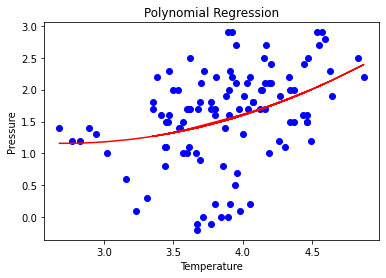

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
poly = PolynomialFeatures(degree = 2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_poly_train, y_train)
test_pred_2 = lin2.predict(x_poly_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

## polynomial regression

## feature

In [64]:
x = combine[['house_price','Export_value']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.302837763150956


In [69]:
x = combine[['house_price','unemploment rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.6091938064175285


In [75]:
x = combine[['house_price','interest rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=4, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.5603153430217239


In [81]:
x = combine[['Export_value','unemploment rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.28093852770619765


In [87]:
x = combine[['Export_value','interest rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.32436139493990535


In [95]:
x = combine[['unemploment rate','interest rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=4, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.5599150146198155


## Three feature

In [99]:
x = combine[['house_price','Export_value','unemploment rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.28631637342035055


In [103]:
x = combine[['Export_value','unemploment rate','interest rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.3124412120161285


In [104]:
x = combine[['house_price','unemploment rate','interest rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)
print('coef:',lin2.coef_)
print('intercept:',lin2.intercept_)

0.7503824812705898
coef: [ 0.00000000e+00 -5.08174486e-03 -2.46060966e-04 -8.54237619e-05
  2.48282765e-08  4.19986908e-05  9.26022665e-05 -7.31383727e-03
 -3.59011146e-03 -2.43093494e-04 -3.62998612e-14 -1.68090566e-10
 -4.82306310e-10  7.08187220e-07  2.75657201e-07  3.33540307e-06
  6.00435478e-03 -8.04871136e-02 -2.22950067e-02  2.86828571e-03]
intercept: 303.3995468581858


In [107]:
x = combine[['house_price','Export_value','interest rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.3126328342119036


## all feature

In [112]:
x = combine[['house_price','Export_value','unemploment rate','interest rate']]
y = combine['inflation_rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) 
po = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True)
x_po_train = po.fit_transform(x_train)
x_po_test = po.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(x_po_train, y_train)
test_pred_2 = lin2.predict(x_po_test)
#testset evaluation
r2 = metrics.r2_score(y_true = y_test, y_pred = test_pred_2)
print(r2)

0.3161894551204495
